# Ranked Choice Voting

Ranked Choice Voting (RCV), also known as Instant Runoff Voting, is a voting system that allows voters to rank candidates in order of preference. Instead of selecting just one candidate, voters have the option to rank multiple candidates from their most preferred to least preferred.

In RCV, the counting process involves multiple rounds. In each round, the candidate with the fewest first-choice votes is eliminated. The votes for the eliminated candidate are then redistributed to the remaining candidates based on the voters' next preferences. This process continues until one candidate receives a majority of the votes.

RCV is designed to ensure that the winning candidate has the support of the majority of voters. It also allows voters to express their preferences for multiple candidates without worrying about "wasting" their vote on a less popular candidate.

In [120]:
import csv
import random

# Define the candidates
candidates = ["Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hank"]
eliminated_candidates = []

# Create vote data (each sublist represents a voter's ranked choices)
votes = []
num_voters = 1000

# for _ in range(num_voters):
#     vote = random.sample(candidates, len(candidates))
#     votes.append(vote)

# Write the data to a CSV file
with open('votes.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Voter"] + [f"Choice {i+1}" for i in range(len(candidates))])
    
    for i in range(num_voters):
        # Generate unique candidate choices for each voter
        # vote = random.sample(candidates.tolist(), len(candidates))        
        vote = random.sample(candidates, len(candidates))
        writer.writerow([f"Voter {i+1}"] + vote)

In [121]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('votes.csv')

# Display the dataframe
df

,Voter,Choice 1,Choice 2,Choice 3,Choice 4,Choice 5,Choice 6,Choice 7,Choice 8
0,Voter 1,Frank,Hank,Grace,Bob,Charlie,Eve,Diana,Alice
1,Voter 2,Charlie,Bob,Frank,Alice,Grace,Diana,Eve,Hank
2,Voter 3,Diana,Grace,Charlie,Hank,Frank,Alice,Eve,Bob
3,Voter 4,Charlie,Hank,Alice,Grace,Diana,Bob,Eve,Frank
4,Voter 5,Bob,Diana,Alice,Eve,Charlie,Frank,Hank,Grace
...,...,...,...,...,...,...,...,...,...
995,Voter 996,Bob,Frank,Charlie,Grace,Hank,Eve,Alice,Diana
996,Voter 997,Grace,Hank,Eve,Alice,Charlie,Bob,Frank,Diana
997,Voter 998,Bob,Diana,Grace,Charlie,Alice,Frank,Eve,Hank
998,Voter 999,Charlie,Bob,Alice,Hank,Eve,Diana,Grace,Frank


In [122]:
import pandas as pd
import matplotlib.pyplot as plt

def RankedChoiceVotingRound(df, candidates, round_text):
    # Count the number of first-choice votes for each candidate
    first_choice_votes = df['Choice 1'].value_counts()

    total_votes = first_choice_votes.sum()
    # Print the results of the current round
    print(f"{round_text}")
    for candidate, votes in first_choice_votes.items():
        print(f"{candidate}: {votes} votes")
    print(f"Total Votes: {total_votes}\n")
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot pie chart
    axs[0].pie(first_choice_votes, labels=[f'{candidate}\n({votes} votes)' for candidate, votes in first_choice_votes.items()], autopct='%1.2f%%', startangle=140)
    axs[0].set_title(f'{round_text} - Pie Chart')

    # Plot bar chart
    colors = plt.cm.tab20.colors[:len(first_choice_votes)]
    axs[1].bar(first_choice_votes.index, first_choice_votes.values, color=colors)
    axs[1].set_title(f'{round_text} - Bar Chart')
    axs[1].set_xlabel('Candidates')
    axs[1].set_ylabel('Number of Votes')
    axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add whitespace between subplots
    fig.subplots_adjust(wspace=0.5)

    # Display the figure
    plt.show()
    
    # Identify the candidate with the fewest votes
    min_votes = first_choice_votes.min()
    eliminated_candidate = first_choice_votes[first_choice_votes == min_votes].index[0]
    print(f"Eliminated Candidate: {eliminated_candidate}\n")
    
    # Eliminate the candidate with the fewest votes
    candidates = [candidate for candidate in candidates if candidate != eliminated_candidate]
    
    # Redistribute the votes of the eliminated candidate
    def redistribute_votes(row):
        if row['Choice 1'] == eliminated_candidate:
            for i in range(2, len(candidates) + 2):
                if row[f'Choice {i}'] in candidates:
                    return row[f'Choice {i}']
            return None
        return row['Choice 1']
    
    df['Choice 1'] = df.apply(redistribute_votes, axis=1)

    if len(candidates) == 1:
        return df, candidates, candidates[0]
    
    return df, candidates, None


Round 1
Alice: 141 votes
Grace: 131 votes
Bob: 130 votes
Frank: 123 votes
Eve: 123 votes
Diana: 122 votes
Hank: 120 votes
Charlie: 110 votes
Total Votes: 1000



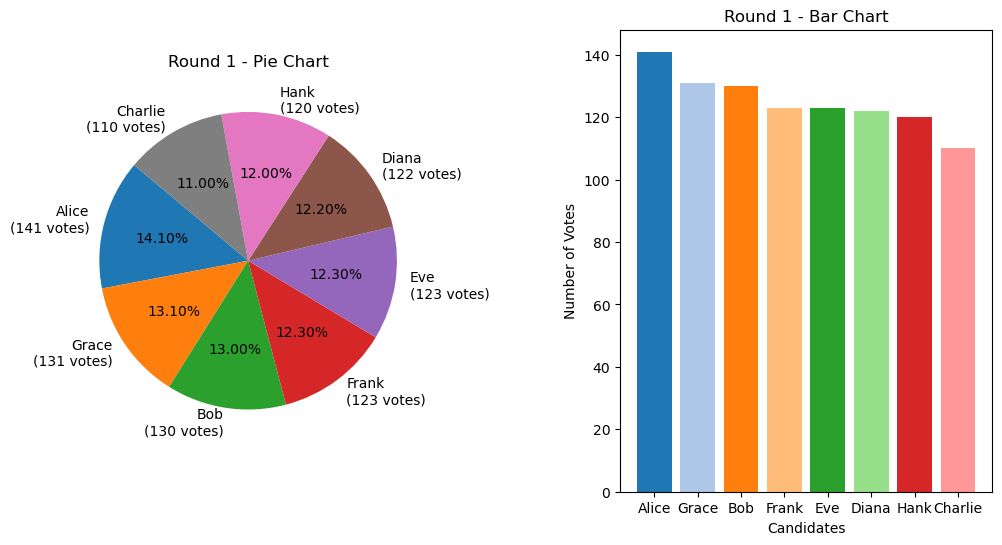

Eliminated Candidate: Charlie

Round 2
Alice: 153 votes
Grace: 150 votes
Bob: 149 votes
Eve: 142 votes
Frank: 140 votes
Diana: 137 votes
Hank: 129 votes
Total Votes: 1000



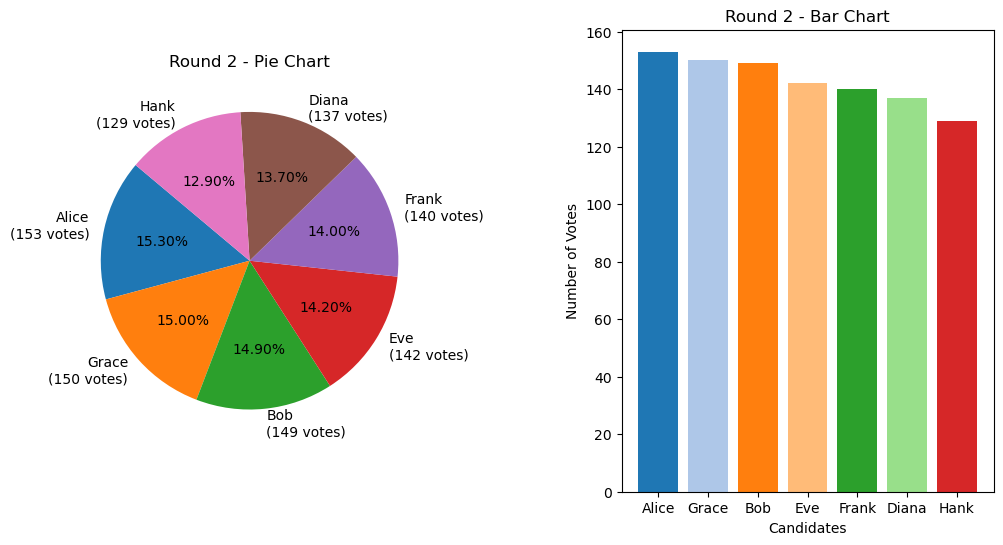

Eliminated Candidate: Hank

Round 3
Alice: 179 votes
Bob: 172 votes
Grace: 168 votes
Eve: 166 votes
Diana: 158 votes
Frank: 157 votes
Total Votes: 1000



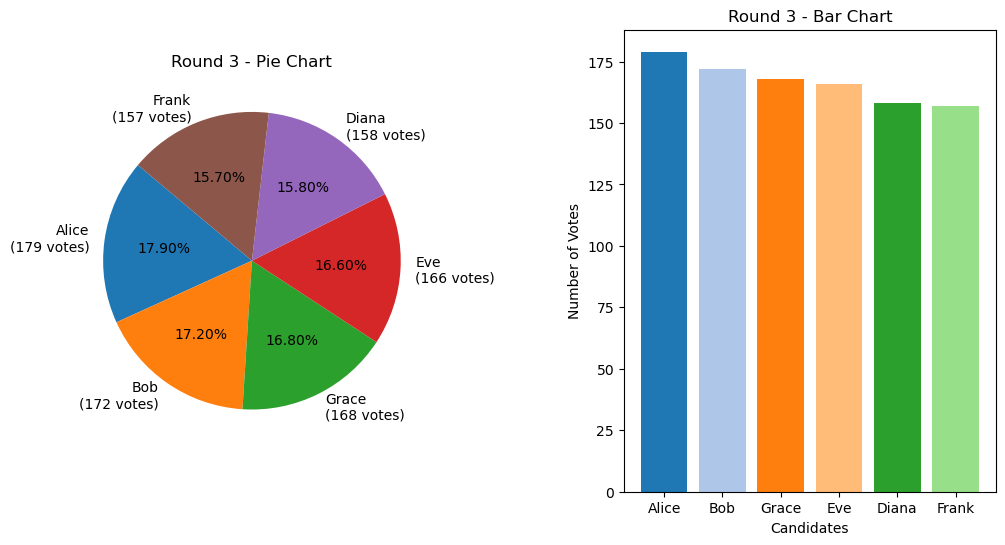

Eliminated Candidate: Frank

Round 4
Alice: 215 votes
Grace: 207 votes
Bob: 198 votes
Eve: 196 votes
Diana: 184 votes
Total Votes: 1000



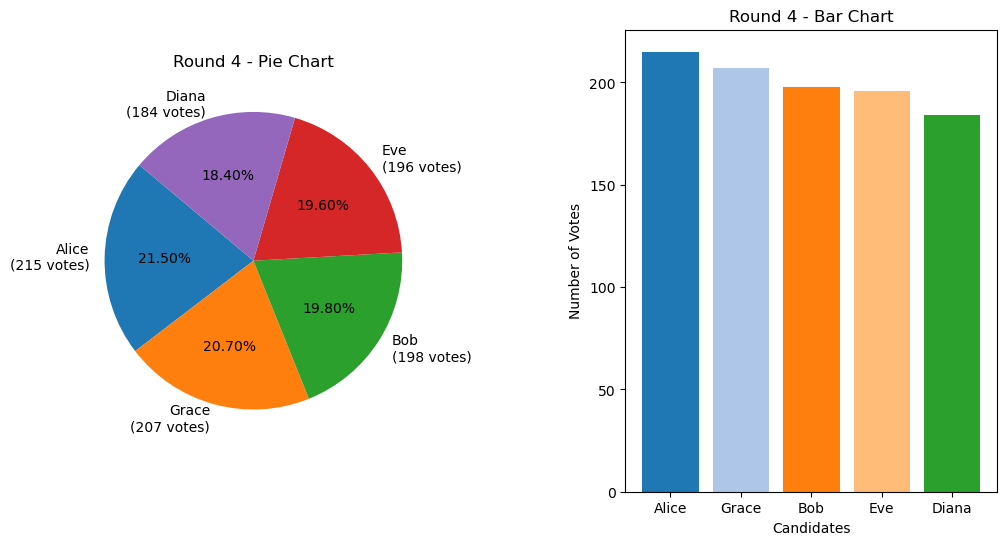

Eliminated Candidate: Diana

Round 5
Alice: 262 votes
Grace: 251 votes
Bob: 246 votes
Eve: 241 votes
Total Votes: 1000



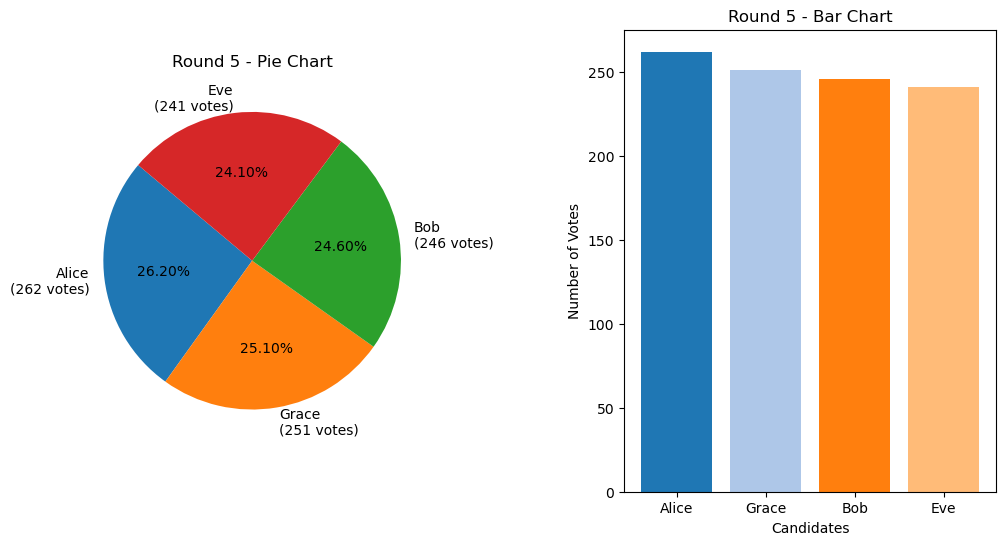

Eliminated Candidate: Eve

Round 6
Grace: 321 votes
Alice: 311 votes
Bob: 310 votes
Total Votes: 942



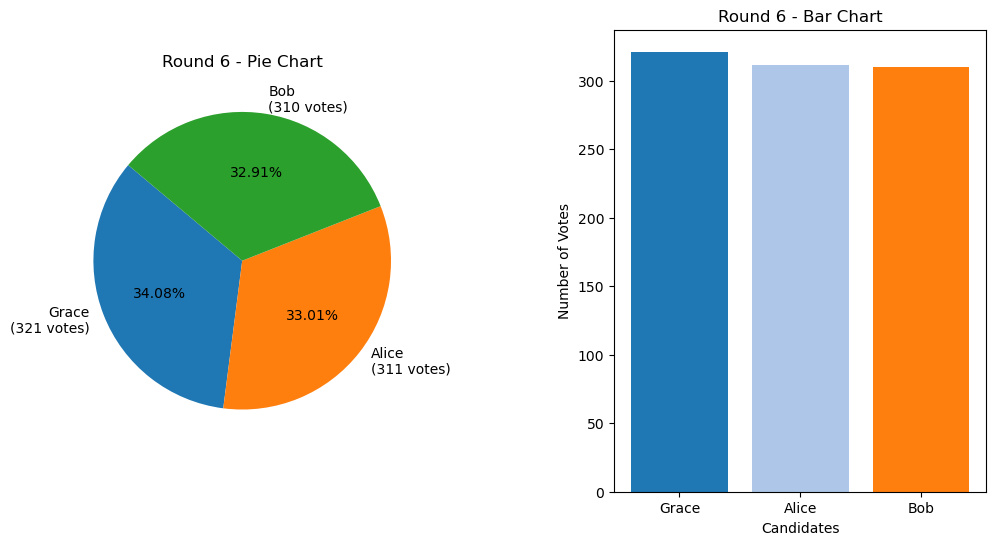

Eliminated Candidate: Bob

Round 7
Grace: 367 votes
Alice: 360 votes
Total Votes: 727



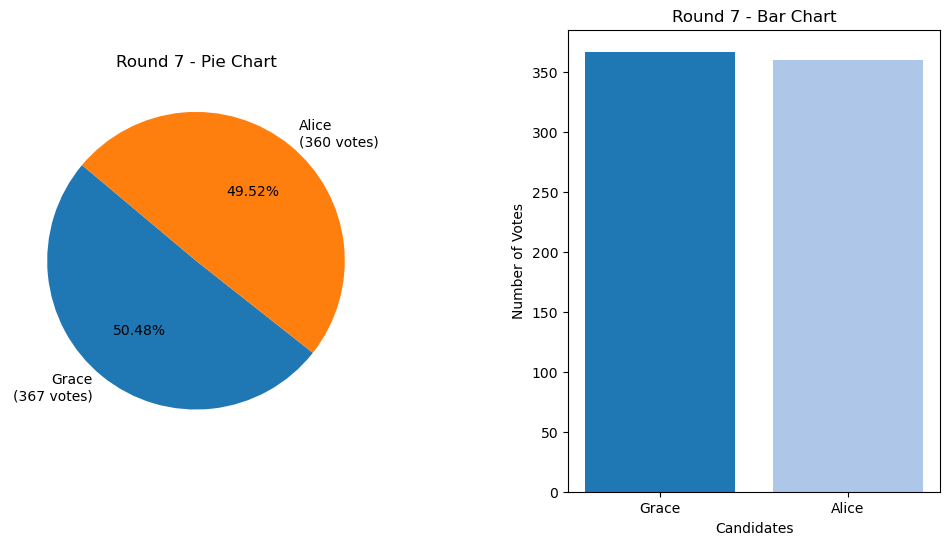

Eliminated Candidate: Alice

Round 8
Grace: 386 votes
Total Votes: 386



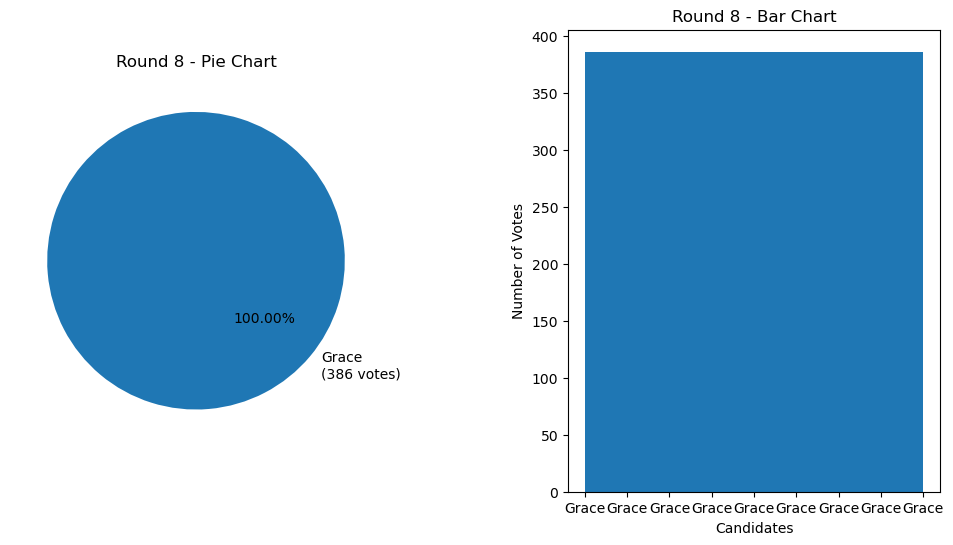

Eliminated Candidate: Grace

Winner: Grace


In [123]:
# Initialize the list of winners
winners = []

# Create an array with a list of all the candidates
candidates = df['Choice 1'].unique()
eliminated_candidates = []

round_number = 1

while len(candidates) > 1:
    df, candidates, winner = RankedChoiceVotingRound(df, candidates, f"Round {round_number}")
    
    round_number += 1

_, _, _ = RankedChoiceVotingRound(df, candidates, f"Round {round_number}")


# Print the winner
# winner = df['Choice 1'].value_counts().idxmax()
print(f"Winner: {winner}")